# 머신 러닝 (1)

## 1) LinearRegression

* 회귀 알고리즘
* 실제 데이터와의 오차를 최소화 하는 최적의 회귀선을 찾는 과정

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' # 차트를 선명하게

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [3]:
# 상위 데이터 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [5]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [6]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


### 2. 데이터 전처리

In [7]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [8]:
# 시계열 데이터이므로 앞의 데이터로 결측치 채우기
data.fillna(method='ffill', inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [9]:
# 오존 농도 예측과 관련 없는 변수 제거
col_x = ['Month', 'Day']
data.drop(col_x, axis=1, inplace=True)

data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [10]:
# x, y 분리
target = 'Ozone'
x = data.drop(target, axis=1)
y = data[target]

In [11]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [12]:
# 학습용, 평가용 데이터 7:3 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

### 3. 모델링

In [13]:
# 회귀 알고리즘, 평가 지표 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 모델 선언
model = LinearRegression()

# 학습
model.fit(x_train, y_train)

# 회귀계수 확인
print(list(x)) # 데이터프레임 컬럼을 리스트로 반환
print('가중치: ', model.coef_)
print('y 절편: ', model.intercept_)
print('-' * 30)

# 예측
y_pred = model.predict(x_test)

# 평가
# 관측치 별 절댓값 오차 합계의 평균
print('MAE: ', mean_absolute_error(y_test, y_pred))
# 전체 오차 중 회귀식이 잡아낸 오차의 비율
print('R2-Score: ', r2_score(y_test, y_pred))

['Solar.R', 'Wind', 'Temp']
가중치:  [ 15.28688712 -69.42097028  56.08922161]
y 절편:  33.06646056724142
------------------------------
MAE:  13.377390093696073
R2-Score:  0.6673645301519779


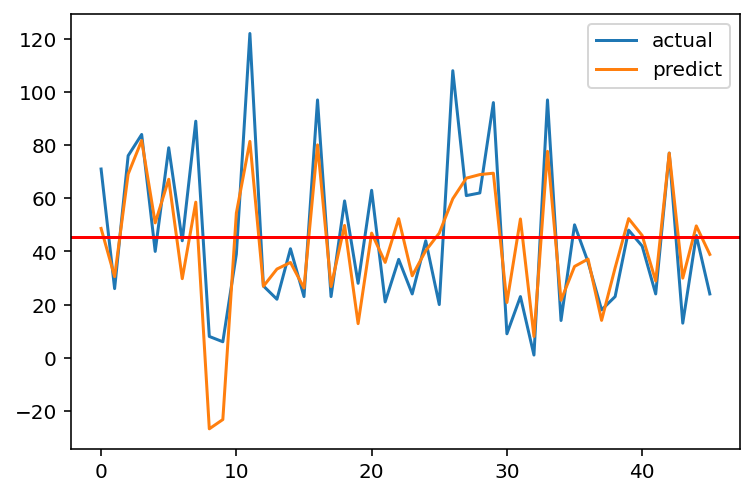

In [14]:
# 예측값, 실제값 시각화
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['actual', 'predict'])
plt.axhline(y_test.values.mean(), color='r')
plt.show()

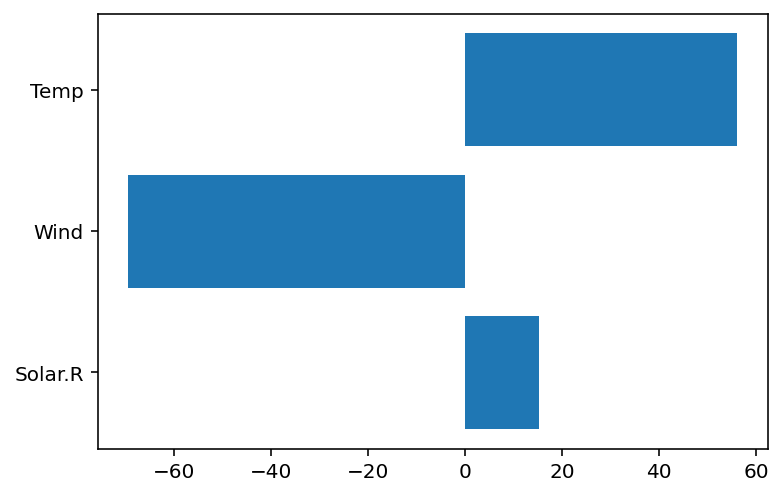

In [15]:
# 가중치 시각화
plt.barh(list(x), model.coef_)
plt.show()

> KNN

In [92]:
# 회귀 알고리즘, 평가 지표 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 모델 선언
model = KNeighborsRegressor()

# 학습
model.fit(x_train, y_train)

# 예측 (예측값 = 최근접 이웃들의 값의 평균)
y_pred = model.predict(x_test)

# 평가
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2-Score: ', r2_score(y_test, y_pred))

MAE:  10.256521739130434
R2-Score:  0.7635360148786453


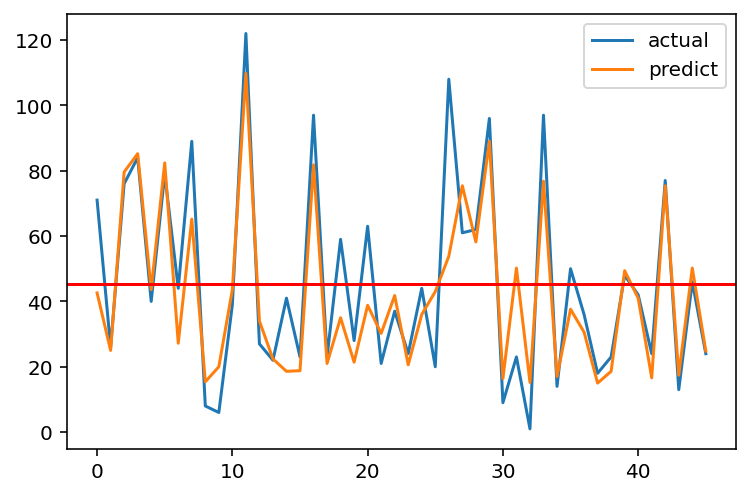

In [93]:
# 예측값, 실제값 시각화
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['actual', 'predict'])
plt.axhline(y_test.values.mean(), color='r')
plt.show()

## 2) KNN

* 회귀, 분류 알고리즘
* 회귀 : 최근접 이웃들의 값의 평균으로 데이터 값을 예측
* 분류 : 최근접 이웃들의 과반 이상의 유형으로 데이터를 분류

In [64]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [65]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)
data['ADMIT'] = data['ADMIT'].map({1:'Yes', 0:'No'})

### 1. 데이터 이해

In [66]:
# 상위 데이터 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,Yes
1,324,107,4,4.0,4.5,8.87,1,Yes
2,316,104,3,3.0,3.5,8.00,1,No
3,322,110,3,3.5,2.5,8.67,1,Yes
4,314,103,2,2.0,3.0,8.21,0,No


In [67]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 31.4+ KB


In [68]:
# 기초통계량 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


In [69]:
# 상관관계 확인
data.corr()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


### 2. 데이터 전처리

In [70]:
# 결측치 확인
data.isna().sum()

GRE         0
TOEFL       0
RANK        0
SOP         0
LOR         0
GPA         0
RESEARCH    0
ADMIT       0
dtype: int64

In [71]:
# x, y 분리
target = 'ADMIT'
x = data.drop(target, axis=1)
y = data[target]

In [72]:
# 학습용, 평가용 데이터 7:3 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

### 3. 모델링

In [73]:
# 분류 알고리즘, 평가 지표 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 모델 선언
model = KNeighborsClassifier(n_neighbors=5)

# 학습
model.fit(x_train, y_train)

# 예측
y_pred = model.predict(x_test)

# 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  9]
 [ 8 59]]
              precision    recall  f1-score   support

          No       0.90      0.89      0.90        83
         Yes       0.87      0.88      0.87        67

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



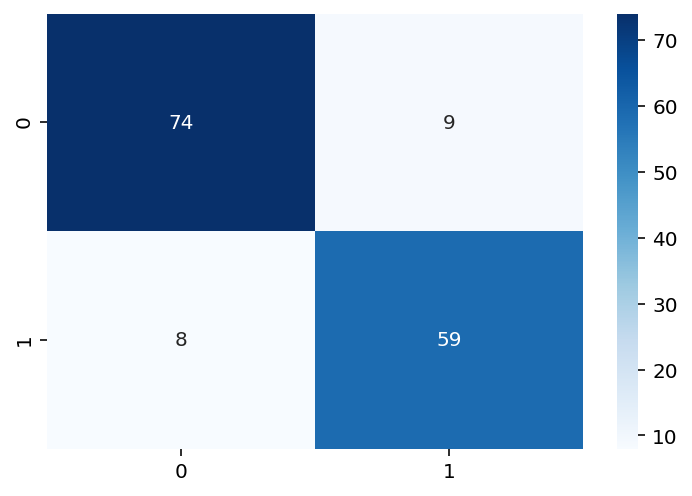

In [75]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()